# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

## Check files in workspace

In [4]:
import os
from utils import get_dataset

In [4]:
print(len(os.listdir("./data/waymo/training_and_validation")))

97


In [9]:
dataset = get_dataset("./data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord")
print(type(dataset))

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


## Getting to know the data format of the images

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

In [10]:
print(dir(dataset))

['_GeneratorState', '__abstractmethods__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_variable_with_custom_getter', '_apply_options', '_as_serialized_graph', '_as_variant_tensor', '_checkpoint_dependencies', '_consumers', '_dataset', '_deferred_dependencies', '_flat_shapes', '_flat_structure', '_flat_types', '_functions', '_gather_saveables_for_checkpoint', '_graph', '_graph_attr', '_handle_deferred_dependencies', '_has_captured_ref', '_inputs', '_list_extra_dependencies_for_serialization', '_list_functions_for_serialization', '_lookup_dependency', '_make_initializable_iterator', '_make_one_shot_iterator', '_m

**the dataset seems easier to work with as a numpy iterator**

In [9]:
# Creating data iterator
data_it = dataset.as_numpy_iterator()

# Displaying the raw data
next(data_it)

{'image': array([[[176, 202, 253],
         [180, 206, 255],
         [180, 206, 255],
         ...,
         [ 27,  45,  47],
         [ 35,  53,  55],
         [ 24,  42,  44]],
 
        [[173, 199, 250],
         [171, 197, 248],
         [176, 202, 253],
         ...,
         [ 24,  42,  44],
         [ 26,  44,  46],
         [ 21,  39,  41]],
 
        [[167, 194, 247],
         [170, 198, 248],
         [170, 198, 248],
         ...,
         [ 22,  40,  42],
         [ 25,  43,  45],
         [ 26,  44,  46]],
 
        ...,
 
        [[ 44,  52,  63],
         [ 46,  54,  65],
         [ 47,  54,  64],
         ...,
         [ 26,  37,  39],
         [ 31,  43,  43],
         [ 32,  44,  44]],
 
        [[ 43,  51,  62],
         [ 45,  53,  64],
         [ 48,  54,  66],
         ...,
         [ 22,  33,  35],
         [ 26,  38,  38],
         [ 29,  41,  41]],
 
        [[ 43,  51,  62],
         [ 45,  53,  64],
         [ 48,  54,  66],
         ...,
         [ 19,  30,

In [13]:
print(type(next(data_it)["image"]))
print(next(data_it)["image"].shape)

<class 'numpy.ndarray'>
(640, 640, 3)


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [43]:
def display_instances(batch, rows=2, cols=5):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    WIDTH = 640
    HEIGHT = 640
    
    # color mapping definition
    CMAP = {1: [1, 0, 0], 2:[0, 1, 0], 3:[0, 0, 1]}
    
    f, ax = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
    
    
    # loop through the batches
    for idx, sample in enumerate(batch.as_numpy_iterator()):
        name = sample['filename']
        npimg = sample['image']
        
        display_x = idx // cols
        display_y = idx % cols
        
        
        try:
            ax[display_x, display_y].imshow(npimg)
        except Exception as e:
            print(e)
            ax.imshow(npimg)
            
        bboxes = sample['groundtruth_boxes']
        classes = sample['groundtruth_classes']
        
        for bbx, cls in zip(bboxes, classes):
            y1, x1, y2, x2 = bbx
            x1, x2 = x1 * WIDTH, x2 * WIDTH
            y1, y2 = y1 * HEIGHT, y2 * HEIGHT
            
            rectangle = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=CMAP[cls])
            
            try:
                ax[display_x, display_y].add_patch(rectangle)
            except Exception as e:
                print(e)
                ax.add_patch(rectangle)
              
            try:
                ax[display_x, display_y].axis('off')
            except Exception as e:
                print(e)
                ax.axis('off')
                
    plt.tight_layout()
    plt.show()
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

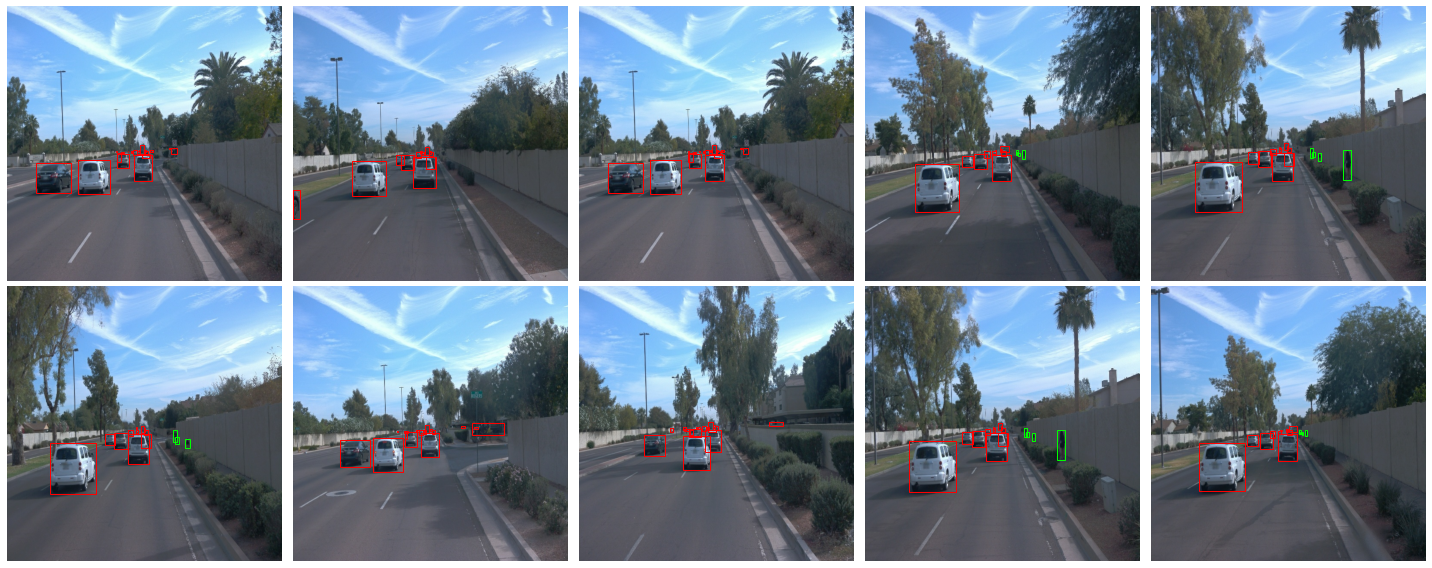

In [44]:
## STUDENT SOLUTION HERE
samples = dataset.shuffle(1).take(10)
display_instances(samples)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

## Class Distribution